# **Pytorch Tensors**

The course will be taught over pytorch which is a library in python designed specifically for deep learning.

Tensors are the main objects on which pytorch is built on. For example, tensors to pytorch have an analogous role as arrays to numpy. (although tenors have some other capabilities that we will see shortly)

In what follows, we will learn how to work with tensors and what their basic properties are.

In [ ]:
import torch
import numpy as np

Tensors are used to represent data through a multi-dimentional array of numbers. However, tensors can encode lots of other attributes such as the internal states and parameters of models. We will also use tensors to encode the inputs and outputs of a model, as well as the model's parameters.

More formally, A "torch.Tensor" is a multi-dimensional matrix containing elements of a single data type. Torch defines 10 tensor types with CPU and GPU variants. [Here](https://pytorch.org/docs/stable/tensors.html#torch.Tensor) is the documentation of the various types.

**Initializing tensors:**


Tensors can be initialized in various ways. Here, we provide a few common examples.


1. **Empty tensor:**

In [ ]:
x = torch.empty(3, 5)
print(x.dtype)
print(x)

2. **Directly from data:** Tensors can be created directly from data. The data type is automatically inferred.

In [ ]:
x = [[1, 2], [3, 4]]
x_data = torch.tensor(x)

# equivalently: x_data = torch.tensor([[1, 2],[3, 4]])

y = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

In [ ]:
print(x_data)
print(y)

print(x_data.dtype)
print(y.dtype)

3. **With random or constant values:**

In [ ]:
x_ones = torch.ones(2, 3)  # all-ones tensor

x_zeros = torch.zeros(2, 3)  # all-zeros tensor

x_identity = torch.eye(
    3
)  # square tensor with diagonal elements as 1 with the rest as 0

x_randn = torch.randn(
    2, 3
)  # tensor filled with random numbers according to the normal distribution

x_normal = torch.normal(
    1, 2, size=(2, 3)
)  # tensor filled according to the normal distribution (mean, variance, size)

In [ ]:
print(x_ones)
print(x_ones.dtype)

In [ ]:
print(x_identity)

In [ ]:
print(x_randn)

4. **From another tensor:** The new tensor retains the properties (shape, datatype)of the argument tensor, unless explicitly overridden.

In [ ]:
x_ones_new = torch.ones_like(
    x_data
)  # retains the properties of x_data #note that the type also transfers
print(x_ones_new)
print(x_ones_new.dtype, "\n")

x_rand = torch.randn_like(x_data, dtype=torch.float)  # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# (try the following and see what will be wrong: x_rand = torch.randn_like(x_data) )

In [ ]:
# you must get an error running the following - try to see why
x_rand = torch.randn_like(x_data)

5. **Bridge to/with numpy:** Tensors can be created from NumPy arrays (and vice versa).

In [ ]:
x = torch.randn(2, 3)
y = x.numpy()
print(y)
print(y.dtype)
# print the type of y

In [ ]:
# Important: In the above cell/example y becomes a copy of x with the same memory allocation. See the following:
y[0, 1] = 100
print(x)

In [ ]:
a = np.ones(5)
b = torch.from_numpy(a)
print(a.dtype)
print(b)

In [ ]:
c = b.long()
print(c.dtype, c)
print(b.dtype, b)

In [ ]:
xr = torch.randn(3, 5)
print(xr.dtype, xr)

In [ ]:
resb = xr + b
resb

In [ ]:
resc = xr + c
resc

Be careful with types:

In [ ]:
resb == resc

In [ ]:
torch.set_printoptions(precision=10)

In [ ]:
resb[0, 2]

In [ ]:
resc[0, 2]

In [ ]:
print(resb[0, 1].dtype)
print(resc[0, 1].dtype)

In [ ]:
xr[0, 1]

**Size of a tensor:**

In [ ]:
x = torch.tensor([[1.0], [2.0], [3.0]])
print(x.size())

torch.Size is in fact a [tuple](https://docs.python.org/3/tutorial/datastructures.html#tuples-and-sequences), so it supports the same operations.

In [ ]:
x.size()[1]

In [ ]:
x.size() == (3, 5)

**Tensors can be multi-dimensional:**

In [ ]:
shape = (2, 3)

x = torch.randn(shape)

print(x)

In [ ]:
shape = (2, 3, 2)

x = torch.randn(shape)

print(x)

In [ ]:
shape = (2, 3, 2, 2)

x = torch.randn(shape)

print(x)

In [ ]:
print(x[1, :])
print(x[1, :].shape)

In [ ]:
print(x[:, 1, :, :])
print(x[:, 1, :, :].shape)

As an example, the following figue illustrates how a 3-d tensor of size (2,5,3) is visualized in pytorch: Noe that when we look across the first dimension (dim_0) we see two tensors of size (3,5), which are indexed by 0 and 1.

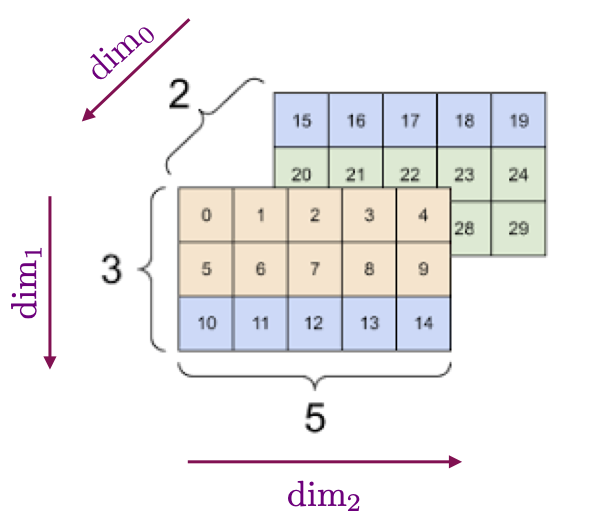

**GPU vs CPU:**

As mentioned before, tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section).

Tensors have been developed specifically as objects that are compatible with GPU computations. In contrast, Numpy arrays and operations can only be performed on a CPU.





**CUDA**

CUDA® is a parallel computing platform and programming model developed by NVIDIA for general computing on graphical processing units (GPUs). With CUDA, developers are able to dramatically speed up computing applications by harnessing the power of GPUs. For more details, see [here](https://jax-ml.github.io/scaling-book/gpus/).

 If you are using Colab, **allocate a GPU by going to Edit > Notebook Settings**.


In [ ]:
x = torch.randn(2, 3)

In [ ]:
torch.cuda.is_available()

In [ ]:
# device = torch.device('cpu')
device = torch.device("cuda")  # Uncomment this to run on GPU

In [ ]:
x.device

In [ ]:
x = x.to(device)

In [ ]:
x.device

In [ ]:
# let us run this cell only if CUDA is available
# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)  # or just use strings ``.to("cuda")``
    z = x + y
    print(z, z.type())
    print(z.to("cpu", torch.double))  # ``.to`` can also change dtype together!

In [ ]:
t = torch.randn_like(x, device="cpu")
(
    t + x
)  # since the devices are different (x is on GPU, and t is on CPU) we'll get an error here

In [ ]:
print(x.device)

In [ ]:
# the following line is only useful if CUDA is available
x = torch.randn(1)
x = x.data
print(x)
print(x.item())
# print(x.cpu().numpy())

In [ ]:
# can numpy array be stored on GPU?
x = np.array([1.0, 2.0])

x.device  # see the error
x = x.to(device)

Let's now see the difference between CPU and GPU computations. Often, a CPU has a handful of cores (e.g. 8 cores), whereas a GPU has thousands of cores. One must note that the GPU cores are much less powerful thatn CPU cores. Hence, GPU is designed to faciliate parallel processing (where a job is broken to thousand pieces distributed over the cores).

Let's consider a simple task, e.g. matrix multiplication, and see how much it takes to do it in a cpu or a GPU:

In [ ]:
import time

# run this for d = 10,100, 1000, 10000 and see what happens

d = 10000
x = torch.randn(d, d)
x = x.to(device="cpu")

t1 = time.time()
z = x @ x
t2 = time.time()

x = x.to(device="cuda")
t3 = time.time()
z = x @ x
t4 = time.time()

print((t2 - t1) / (t4 - t3))

**Tensor Operations:**

There are over 100 tensor operations, including transposing, indexing, slicing, mathematical operations, linear algebra, random sampling, and more that can be performed on tensors (a list is given [here](https://pytorch.org/docs/stable/torch.html)). Each of these operations can be run on the GPU (at typically higher speeds than on a CPU).

**Standard numpy-like indexing and slicing:**


In [ ]:
tensor = torch.ones(4, 4)
print(tensor)
tensor[1, :] = 0
print(tensor)

In [ ]:
# A very useful slicing method:

A = torch.randn(3, 3)

print(A)


tensor1 = A[
    torch.tensor([1, 2]), torch.tensor([0, 2])
]  # it will create the tensor [ A[1,0], A[2,2] ]

print(tensor1)

In [ ]:
# Another example
A = torch.randn(3, 3, 3)

print(A)


tensor1 = A[
    torch.tensor([1, 2]), torch.tensor([0, 2]), torch.tensor([2, 2])
]  # it will create the tensor [ A[1,0,2], A[2,2,2] ]

print(tensor1)

**Joining tensors**: You can use torch.cat to concatenate a sequence of tensors along a given dimension. See also [torch.stack](https://pytorch.org/docs/stable/generated/torch.stack.html), another tensor joining op that is subtly different from torch.cat.

In [ ]:
A = torch.randn(2, 2)
print(A)
t1 = torch.cat([A, A, A], dim=1)
print(t1)

**Multiplying tensors:**

In [ ]:
# elementwise product:

tensor1 = torch.tensor([[1.0, 2.0], [3, 4]])
tensor2 = torch.ones_like(tensor1)

print(tensor1.dtype)


# This computes the element-wise product
print(tensor1.mul(tensor2), "\n")
# Alternative syntax:
print(tensor1 * tensor2)

In [ ]:
# matrix product:

# This computes the matrix product
print(tensor1.matmul(tensor2), "\n")
# Alternative syntax:
print(tensor1 @ tensor2)

**In-place operations:** Operations that have a _ suffix are in-place. For example: x.copy_(y), x.t_(), will change x.

In [ ]:
print(tensor1, "\n", tensor2, "\n")
tensor1.add_(tensor2)
print(tensor1)

In [ ]:
tensor1.t_()  # in-place transpose
print(tensor1)

In [ ]:
tensor1.fill_(5)
print(tensor1)

**Permuting a tensor:**

In [ ]:
x = torch.randn(2, 3, 5)
print(x.size())
print(torch.permute(x, (2, 0, 1)).size())

**Reshaping**:
This command casts the tensor to the desired shape, provided that the number of elements in input and the destination match.

In [ ]:
x = torch.arange(30)
print(x)


x_reshaped = x.reshape(2, 5, 3)
print(x_reshaped)

### you can change the dimension of tensors:
x_reshaped2 = x_reshaped.reshape(2, -1)
print(x_reshaped2)


###
x_reshaped3 = x_reshaped.reshape(-1)
print(x_reshaped3)

In [ ]:
# exercise: Try to understand what's happening here:
a = torch.arange(16.0)
b = torch.reshape(a, (2, 2, 2, 2))
print(b)

In [ ]:
c = torch.reshape(
    b,
    (
        2,
        2,
        -1,
    ),
)
print(c)

In [ ]:
d = torch.reshape(b, (4, -1))
print(d)

In [ ]:
# exercise: Try to understand what's happening here:
a = torch.arange(18.0)
b = torch.reshape(a, (2, 3, 3))
print(b)
d = torch.reshape(b, (3, -1))
print(d)

Let us explain the above example in a bit more detail. Here "-1" means:

“infer this dimension automatically so the total number of elements stays the same.”

Original number of elements:
2
×
3
×
3
=
18
2×3×3=18

New shape requires the first dimension to be 3 → so the second dimension is inferred as
18
/
3
=
6
18/3=6.

So new shape is (3, 6).

Now PyTorch takes the underlying flattened order of b (which is still [0, 1, 2, ..., 17] in memory) and reshapes it into a (3,6) matrix:

In [ ]:
# Exercise: Does Transpose (that is, .T) do the same job as reshaping a matrix m*n matrix to n*m:

# Try to answer the above and then run the following to see the answer:

x = torch.arange(6).reshape(2, 3)
print("Original x:\n", x)

# Reshape to (3, 2)
reshaped = x.reshape(3, 2)
print("\nReshaped to (3, 2):\n", reshaped)

# Transpose to (3, 2)
transposed = x.t()
print("\nTransposed (x.t()):\n", transposed)

In [ ]:
# exercise: Try to understand what's happening here:

a = torch.arange(24)
b = torch.reshape(a, (3, 4, 2))
print(b)
c = torch.reshape(b, (2, 12))
print(c)

In [ ]:
x = torch.randn(2, 3)
print(x)
y = x.reshape(3, 2)
y[0, 0] = 10000
print(x)

**View:**

PyTorch allows a tensor to be a View of an existing tensor. View tensor shares the same underlying data with its base tensor. Supporting View avoids explicit data copy, thus allows us to do fast and memory efficient reshaping, slicing and element-wise operations.

For example, to get a view of an existing tensor t, you can call `t.view(...)`.

In [ ]:
a = torch.arange(16.0)
b = a.view(2, 8)

print(a)
print(b)

c = b.view(-1)
print(c)

Important: Difference between `reshape` and `view`: While reshape can sometimes creates a new tensor with the same data, view creates a view of the original tensor. Use reshape when you need to create a new tensor with a different shape, and use view when you want to manipulate parts of a tensor without copying the data.

Let us explain this in more detail:

A tensor is **contiguous** if its elements are stored in memory in the same order as they appear when iterating over it. In other words, the memory layout of the tensor matches its shape and stride layout exactly.

When you create a tensor or reshape it in certain ways, PyTorch lays out its data in a block of memory. Some operations like .transpose() or .permute() do not move the actual data, they just change the way PyTorch views it by modifying strides. This results in a non-contiguous tensor; i.e. the data is not laid out sequentially anymore.

In [ ]:
x = torch.randn(2, 3)
print(x.is_contiguous())  # True

x_t = x.t()  # Transpose
print(x_t.is_contiguous())  # False

# To make it contiguous again:
x_t_contig = x_t.contiguous()
print(x_t_contig.is_contiguous())  # True

Why does this matter? Some PyTorch operations (like view()) need tensors to be contiguous because they assume data is laid out linearly in memory. If the tensor isn’t contiguous, they’ll raise an error unless you call .contiguous() first.

In [ ]:
# Example:
x = torch.randn(2, 3)

x_t = x.t()  # Transpose

# some times (in some versions of pytorch) you may get an error if you execute the following:
x.t().view(3, 2)

So what's the main difference between reshape() and view()?

reshape() has **memory flexibility**: reshape() can work with non-contiguous tensors. If needed, it will internally make the tensor contiguous and possibly return a copy with a different memory allocation.

In [ ]:
# Example where copy is not made (in reshaping):
x = torch.randn(2, 3)
y = x.reshape(3, 2)
print(x.data_ptr() == y.data_ptr())  # True → same memory = no copy

In [ ]:
# Example where copy is made (in reshaping) due to non-contiguity:
# Create a base tensor
x = torch.arange(100).reshape(10, 10)

# Slice it — this makes a view into a subset of x, not full storage
x_sliced = x[:, :5]  # Shape (10, 5), still non-contiguous in memory
print("x_sliced is contiguous:", x_sliced.is_contiguous())

# Now reshape — this will force a copy
y = x_sliced.reshape(5, 10)

# Check if it's the same data
print("Do x_sliced and y share data?", y.data_ptr() == x_sliced.data_ptr())  # False

# Modify y and confirm x_sliced is unaffected
y[0, 0] = 999
print("\nModified y:\n", y)
print("\nx_sliced remains unchanged:\n", x_sliced)

**Math Operations**


Most of mathematical functions(Pointwise, Comparisions, ...) are already predefined on pytorch. Although many of the python syntaxes still work. Here are some examples:

Learn more about them [HERE](https://pytorch.org/docs/stable/torch.html)

In [ ]:
x = torch.randn(2, 2)
print(x, "\n")
### Pointwise operations:
print(torch.add(x, 10))
print(x + 10, "\n")

print(torch.abs(x), "\n")

print(torch.square(x))
print(x**2, "\n")

print(torch.sin(x), "\n")

In [ ]:
### Recall the inplace operations
print(x, "\n")

print(torch.sin_(x), "\n")

print(x)

In [ ]:
### Comparison operations:
x = torch.arange(9).reshape(3, 3)

print(x)

print(torch.isreal(x))  # real vs imaginary

print(torch.isin(x, torch.tensor([2, 6, 0])), "\n")

In [ ]:
print(x >= 2, "\n")

print(torch.logical_and(x >= 2, x <= 6), "\n")

In [ ]:
### Reduction operations: Which axis to take action on is required here.

x = torch.randint(5, size=(3, 3))
print(x)

print(torch.sum(x, dim=0))
## If you don't specify any dims(axis), torch applies it to all.
print(torch.sum(x), "\n")

x = torch.randn(3, 3)
print(x)
print(torch.var_mean(x, dim=1))

**Broadcasting:**

Broadcasting automatically expands dimensions by replicating coefficients, when it is necessary to perform operations.

1. If one of the tensors has fewer dimensions than the other, it is reshaped by adding as many dimensions of size 1 as necessary in the front; then

2. for every mismatch, if one of the two tensor is of size one, it is expanded along this axis by replicating coefficients.

If there is a tensor size mismatch for one of the dimension and neither of them is one, the operation fails.

In [ ]:
# A simple example:
a = torch.tensor([[1], [2], [3]])  # Shape: (3, 1)
b = torch.tensor([10])  # Shape: (1)

c = a + b  # Shape: (3, 4)
print(c)

In [ ]:
# another example
A = torch.tensor([[1.0], [2.0], [3.0], [4.0]])
print(A.size())
B = torch.tensor([[5.0, -5.0, 5.0, -5.0, 5.0]])
print(B.size())
C = A + B

In [ ]:
print(C)

In [ ]:
# Another example:
a = torch.zeros(3, 4, 5)
b = torch.randn(5)  # Shape: (5,)

c = a + b  # Broadcasts b to (3, 4, 5)
print(c.shape)  # (3, 4, 5)

In [ ]:
print("b = ", b, "\n")
print("c =", c)

In the above example:
- b: shape (5,) → treated as (1, 1, 5)
- Broadcasts along the first two dimensions

Note: If the dimesions don’t match and neither is 1, PyTorch will raise an error

In [ ]:
# example of an error
a = torch.randn(2, 3)
b = torch.randn(4, 3)

# This will raise an error:
c = a + b

**Important:** Slicing and broadcasting can often be used to avoid "for loops", and hence the computation can become much faster.  

---



Let's consider the following example: We are given a score matrix $M$ of size $n \times k$, as well as an integer-valued vector $y$ whose entries belong to the set $\{0,1,\cdots, k-1\}$. We would like to compute the following quantity:   

$$ S = \sum_{i=1}^n \log\left( \frac{e^{M_{i,y_i}}}{\sum_{j=1}^k e^{M_{i,j}}} \right)$$

In [ ]:
import time

In [ ]:
n = 10000
k = 50


M = torch.rand(n, k)
y = torch.randint(0, k, size=(n,))
sum_exps = torch.empty(
    n,
)

t1 = time.time()  # oututs the current time in seconds


S = 0
for i in range(n):
    S = 0
    for j in range(k):
        S = S + torch.exp(M[i, j])
    sum_exps[i] = S

S = 0
for i in range(n):
    S = S + torch.log(torch.exp(M[i, y[i]]) / sum_exps[i])

t2 = time.time()

print(t2 - t1)

In [ ]:
t3 = time.time()

M_exp = torch.exp(M)
sum_exps = torch.sum(M_exp, dim=1)
torch.sum(torch.log(M_exp[torch.arange(n), y] / sum_exps))

t4 = time.time()

print(t4 - t3)

print((t2 - t1) / (t4 - t3))

**Replicablity**

There are many times that you need to get the the same output from a random initialization, or a random data coming from a specific distribution. Using the fact that random numbers are generated from a seed (which usually comes from the system time), we can manually use different seeds to get the same result everytime.

In [ ]:
print(torch.randn(2, 2))

print(torch.randn(2, 2))

In [ ]:
torch.manual_seed(18)
print(torch.randn(2, 2), "\n")

print("hello")

### it only set initial seed to some value, next time you use the function it moves on.
print(torch.randn(2, 2), "\n")


torch.manual_seed(18)
print(torch.randn(2, 2), "\n")


print(torch.randn(2, 2))

In [ ]:
torch.manual_seed(12)
print(torch.randn(2, 2))

torch.manual_seed(12)
print(torch.randn(2, 2))

**Shared memory:**

Changing the torch tensor modifies the numpy array and vice-versa...

This is explained in the PyTorch documentation [here](https://docs.pytorch.org/docs/stable/generated/torch.from_numpy.html?utm_source=chatgpt.com): The returned tensor by torch.from_numpy and ndarray share the same memory. Modifications to the tensor will be reflected in the ndarray and vice versa.

In [ ]:
a = np.ones(5)
b = torch.from_numpy(a)
print(b)

a = b.T

In [ ]:
a[2] = 0
print(b)

In [ ]:
b[3] = 5
print(a)

The same holds when we use "=" to assign tensors -- see the following:

In [ ]:
tensor1 = torch.ones(2, 3)
tensor2 = tensor1
print(tensor1, "\n", tensor2)
tensor2[0, 0] = 1000
print(tensor1, "\n", tensor2)

One way to copy without sharing memory is as follows (we're going to see a few other ways later) to use .clone()

In [ ]:
t1 = torch.tensor([1, 2, 3])
t2 = t1.clone()  # Deep copy

t2[0] = 999
print(t1)  # Still [1, 2, 3]